In [1]:
import numpy as np
import random
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter

/home/milan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# CLASSIFICATION

In [151]:
features = pd.read_csv('FINAL_FEATURES_UNCORR_BALANCED_ALL.csv', sep = '\t', index_col = 0)

# Filter features

In [152]:
#demo_off  = ['WHERE_' +  w for w in ['PercLev4Qu', 'z_PercLev4Qu',  'zt_MedHPrice', 'IncomeScor', 'z_IncomeScor', 'GiniSimpso', 'zt_GiniSimpso', 'NotBornUK', 'z_NotBornUK_ratio', 'zt_PopDen', 'LivingEnSc', 'z_LivingEnSc', 'NoFlats', 'PTALScore', 'zt_PTALScore', 'EntireAirb', 'zt_ArtsEmploy_ratio', 'NoHotels', 'NoEmployee',  'No4sqCheck', 'NoOSPOIs', 'zt_NoOSPOIs', 'zt_NoEmployee_ratio','NoOwndDwel', 'z_NoOwndDwel_ratio', 'NoHouses', 'z_NoHouses_ratio','z_distCent1', 'zt_GrenSpace',  'zt_NoPropsSld',  'zt_NoCTFtoH']]
#user_nw   = [u for u in features.keys() if 'WHO_u' in u]
#user_succ = [u for u in features.keys() if 'tipCount' in u or 'checkinsCount' in u or 'usersCount' in u or 'Llikecount' in u or 'lLondon' in u]
#features  =ű
#features.drop(columns = demo_off + user_nw + user_succ)
#len(features.keys())
len(features.keys())

13

# Split features 

In [153]:
X = features#.drop(columns = ['LABEL_category'])
y = np.asarray(features['LABEL_category'])

In [14]:
#def classifiers(XX, yy, randomized):     
    #print XX.LABEL_category
    #m = [mm for mm in XX.keys() if 'distance_f' in mm]  
#    XX_ = XX.drop(columns = [c for c in XX.keys() if 'label' in c.lower()])
#    y_  = yy   
    #if randomized: random.shuffle(y_)     
#    classifier = RandomForestClassifier(max_depth=5, n_estimators=1000, max_features='auto') 
    #classifier = GaussianNB()
    #classifier = SVC()#SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]¶
#    X_train, X_test, y_train, y_test =  train_test_split(XX_, y_, test_size=.33, random_state=42)#, stratify = y_)    
#    classifier.fit(X_train, y_train)
#    score = classifier.score(X_test, y_test)
#    preds = classifier.predict(X_test)
#    print 'Randomized: ', randomized, '\tAccuracy: ', score, '\n'
#    print classification_report(y_test, preds), '\n\n'  
#classifiers(X, y, False)
#classifiers(X, y, True)

# PROBABILITY STUFF

### Success stuff

In [154]:
def get_quantiles(success):
 
    success['quartile'] = pd.qcut(success['Llikecount'], 4, ['q1', 'q2', 'q3', 'q4'])
    success             = pd.DataFrame(success[['Llikecount', 'quartile']])
    
    Qs = {}
    for q in ['q1', 'q2', 'q3', 'q4']:
        Qs[q] = list(success[success['quartile'] == q].index)

    return Qs


city        = 'london'
datafile    = 'FINAL_DATA'
successdata = datafile + '/london_venues_success_measures.csv'
venues      = [line.strip() for line in open(datafile + '/senior_venues_lists.dat')]

success  = pd.read_csv(successdata, sep = '\t', index_col = 0)
success  = success[~success.index.duplicated(keep='first')]   
success  = success[success.index.isin(venues)]


successdata_L = datafile + '/london_venues_success_measures_local_like.csv'
success_L     = pd.read_csv(successdata_L, sep = '\t', index_col = 0)
success_L     = success_L[~success_L.index.duplicated(keep='first')]   
success       = success.join(success_L)

success['quartile'] = pd.qcut(success['Llikecount'], 4, ['q1', 'q2', 'q3', 'q4'])

Qs = get_quantiles(success)

### Features

In [155]:
#features  = pd.read_csv('senior_venues_features_labels_clusternames.csv', sep = '\t', index_col = 0)
#demo_off  = ['WHERE_' +  w for w in ['PercLev4Qu', 'z_PercLev4Qu',  'zt_MedHPrice', 'IncomeScor', 'z_IncomeScor', 'GiniSimpso', 'zt_GiniSimpso', 'NotBornUK', 'z_NotBornUK_ratio', 'zt_PopDen', 'LivingEnSc', 'z_LivingEnSc', 'NoFlats', 'PTALScore', 'zt_PTALScore', 'EntireAirb', 'zt_ArtsEmploy_ratio', 'NoHotels', 'NoEmployee',  'No4sqCheck', 'NoOSPOIs', 'zt_NoOSPOIs', 'zt_NoEmployee_ratio','NoOwndDwel', 'z_NoOwndDwel_ratio', 'NoHouses', 'z_NoHouses_ratio','z_distCent1', 'zt_GrenSpace',  'zt_NoPropsSld',  'zt_NoCTFtoH']]
#user_nw   = [u for u in features.keys() if 'WHO_u' in u]
#user_succ = [u for u in features.keys() if 'tipCount' in u or 'checkinsCount' in u or 'usersCount' in u or 'Llikecount' in u or 'lLondon' in u]

#features  = features.drop(columns = demo_off + user_nw + user_succ)
#features  = features.drop(columns = [c for c in features.keys() if '_inv_' in c])
#features  = features.drop(columns = [c for c in features.keys() if '_grav_' in c])

#print len(features.keys()), len(features)
#features = features.dropna()
#print len(features.keys()), len(features)
#features = features.drop(columns = ['WHO_v_wa_eigenvector_grav_distances'])
#features = features.drop(columns = ['LABEL_category'])

features.head()

,WHAT_pricerange,WHO_m_avg,WHO_fraction_of_regulars,WHERE_DistCentre,WHERE_IMDScore,WHERE_emb_own_cat,WHO_v_wa_clustering,WHO_v_wa_constraint,LABEL_category,WHEN_firsttime,WHEN_hour_most,WHEN_day_most,WHO_female_fraction
venue,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,2.0,1.836947,0.131579,0.000000,0.00,2.831711,0.0,1.0,1,1.342290e+09,19,1,0.302632
4abcec53f964a520b98720e3,0.0,1.997953,0.166667,79.164364,24.73,12.863672,0.0,0.0,1,1.340045e+09,10,0,0.303030
4abdc1c7f964a5206d8b20e3,2.0,1.809184,0.196721,875.514177,29.91,14.821463,0.0,0.0,1,1.343146e+09,18,0,0.277419
4abe4502f964a520558c20e3,0.0,1.797899,0.112536,79.164364,24.73,18.232509,0.0,0.0,5,1.346061e+09,21,1,0.439033
4abe5714f964a520d68c20e3,3.0,2.008383,0.225806,115.947206,20.48,3.733880,0.0,0.0,1,1.342808e+09,18,6,0.517241


# Correlations

In [26]:
corrmtx = features.corr()

In [27]:
print len(corrmtx), len(corrmtx.keys())
corrmtx

13 13


,WHAT_pricerange,WHO_m_avg,WHO_fraction_of_regulars,WHERE_DistCentre,WHERE_IMDScore,WHERE_emb_own_cat,WHO_v_wa_clustering,WHO_v_wa_constraint,LABEL_category,WHEN_firsttime,WHEN_hour_most,WHEN_day_most,WHO_female_fraction
WHAT_pricerange,1.000000,0.353668,-0.013325,-0.089685,-0.027019,-0.282288,-0.028656,-0.039505,0.064046,-0.036888,0.059310,0.132401,0.016285
WHO_m_avg,0.353668,1.000000,0.029316,-0.309368,-0.123983,-0.133580,-0.024744,-0.115481,0.058305,-0.048663,0.062693,0.069736,0.194150
WHO_fraction_of_regulars,-0.013325,0.029316,1.000000,0.124586,0.038755,0.026067,0.016614,0.013312,0.025205,0.009568,0.005479,0.000205,0.022350
WHERE_DistCentre,-0.089685,-0.309368,0.124586,1.000000,0.219418,0.166647,0.131181,0.127775,-0.047782,-0.011367,0.016257,-0.035495,0.055596
WHERE_IMDScore,-0.027019,-0.123983,0.038755,0.219418,1.000000,0.072610,0.040690,0.055513,-0.056700,0.050079,0.016904,-0.071389,-0.037102
WHERE_emb_own_cat,-0.282288,-0.133580,0.026067,0.166647,0.072610,1.000000,-0.003381,-0.022458,0.007154,-0.063017,0.012159,-0.072776,-0.126068
WHO_v_wa_clustering,-0.028656,-0.024744,0.016614,0.131181,0.040690,-0.003381,1.000000,0.172943,-0.021757,0.048086,0.001164,-0.045953,-0.027866
WHO_v_wa_constraint,-0.039505,-0.115481,0.013312,0.127775,0.055513,-0.022458,0.172943,1.000000,-0.113019,-0.059803,-0.009420,-0.051343,-0.013083
LABEL_category,0.064046,0.058305,0.025205,-0.047782,-0.056700,0.007154,-0.021757,-0.113019,1.000000,0.269653,0.011390,-0.008708,-0.032077
WHEN_firsttime,-0.036888,-0.048663,0.009568,-0.011367,0.050079,-0.063017,0.048086,-0.059803,0.269653,1.000000,-0.077433,-0.047693,0.033870


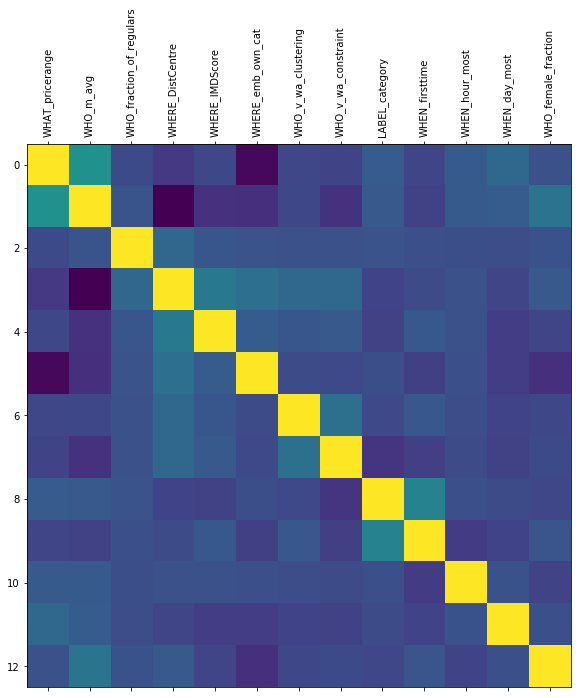

In [28]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ax.matshow(corrmtx)
ax.set_xticks(range(len(features.keys())))
ax.set_xticklabels(features.keys(), rotation = 90)
a = 0

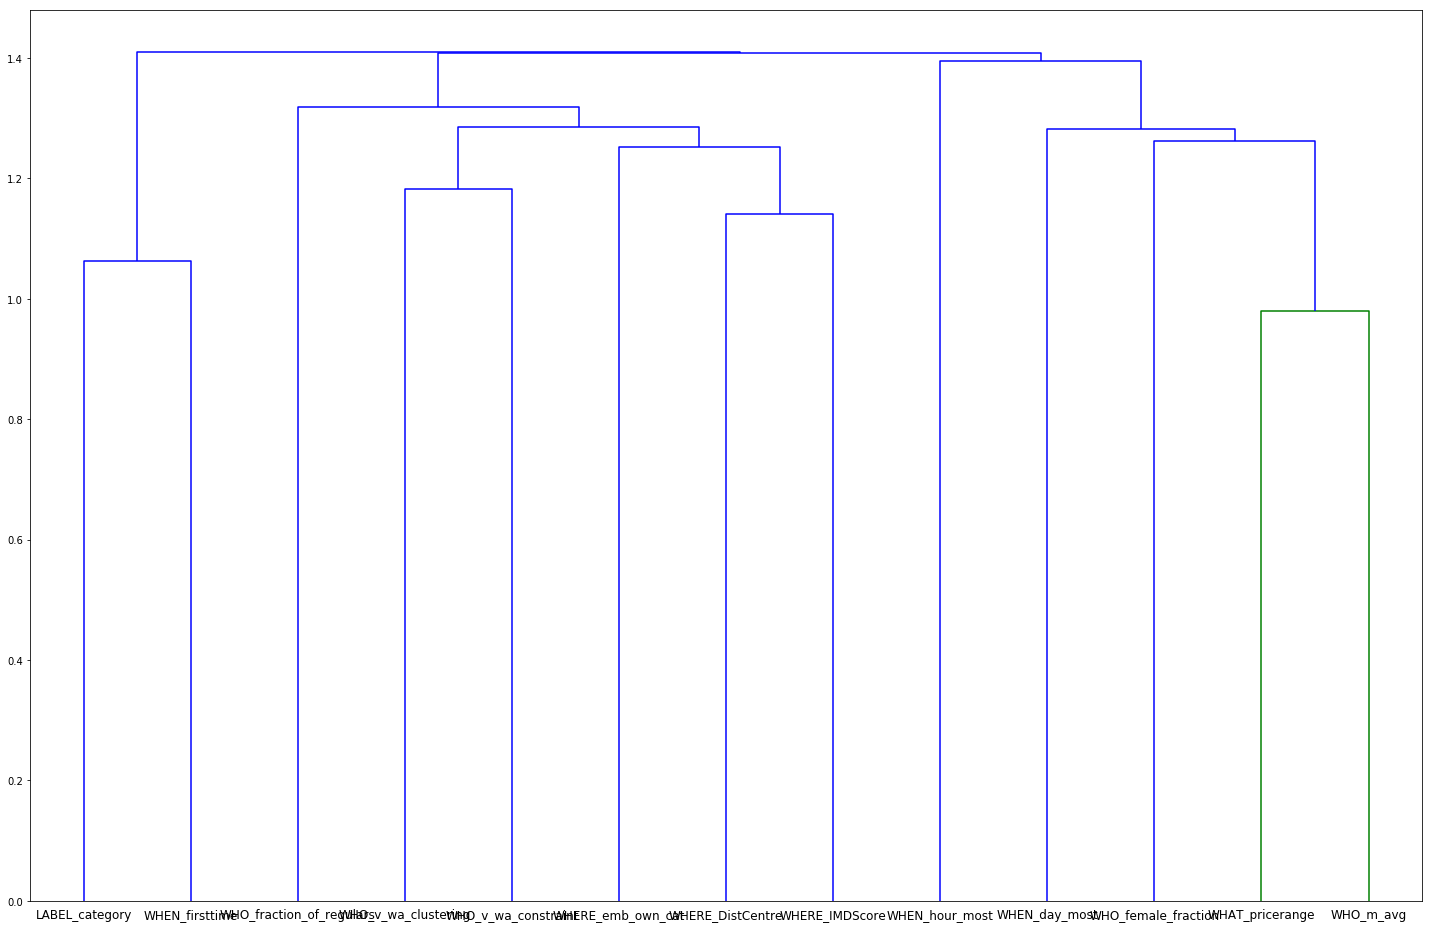

In [29]:
f, ax = plt.subplots(1,1,figsize=(20,13))

linkage_matrix = linkage(corrmtx, "single")

d = dendrogram(linkage_matrix, color_threshold=1, ax = ax)
ax.set_xticklabels([ features.keys()[i] for i in d['leaves']   ], fontsize = 12)

plt.tight_layout()
plt.savefig('variables.png')
plt.show()

In [30]:
clusters    = list(set(features.LABEL_category))
df_clusters = [features[features.LABEL_category == c] for c in clusters ]
clusters

[0, 1, 2, 3, 4, 5]

(0.8584083044982699, 0.9134486735870818, 0.9645674740484429)

In [31]:
measures = [k for k in features.keys() if 'LABEL' not in k]
len(measures)

12

In [32]:
def getBinnedDistribution(x, y, nbins):

    n, bins   = np.histogram(x, bins=nbins)
    sy, _  = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy/n
     
    std = np.sqrt(sy2/n - mean*mean) 

    return _, mean, std

6
11 WHEN_day_most


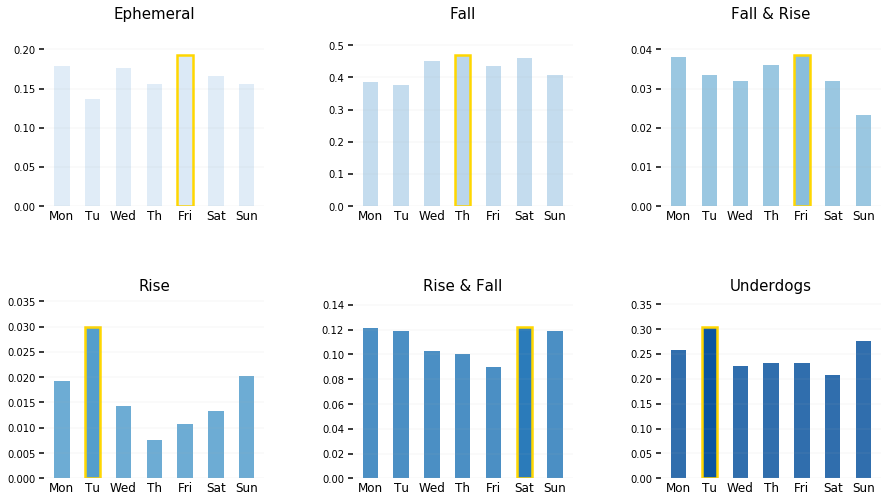

In [207]:
import seaborn as sns

indicies  = [(i,j) for i in range(2) for j in range(3)]
nbins     = 12
measures  = [k for k in features.keys() if 'LABEL' not in k and 'WHO' not in k]
outfolder = 'PROBPLOTS'

if not os.path.exists(outfolder): os.makedirs(outfolder)  
venue_prob_features = {}


cluster_names_size = {  1316 : 'Ephemeral',
                        3375 : 'Fall',
                        269  : 'Fall & Rise',
                        160  : 'Rise',
                        944  : 'Rise & Fall',
                        2119 : 'Underdogs'  }

colors = sns.color_palette("Blues")
print len(colors)

for jind, measure in enumerate(features.keys()):

    
    '''   JIND == 11  ---> DAY   '''
    
    if jind == 11: 
        
        print jind, measure
        
        f, ax     = plt.subplots(2, 3, figsize = (15,7))
        #plt.suptitle(measure, fontsize = 16)
        for ind, cluster in enumerate(clusters):
            bx          = ax[indicies[ind]]
            df_meas_all = pd.DataFrame(features[[measure, 'LABEL_category']]).fillna(0)
            df_meas     = df_meas_all
            df_cluster  = df_meas[df_meas.LABEL_category == cluster]

            
            ctitle = cluster_names_size[len(df_cluster)]
            
            if len(set(df_meas_all[measure])) > nbins:

               
                n,  bins      = np.histogram(df_cluster[measure],  bins=nbins)
                Nn, Nbins     = np.histogram(df_meas[measure],     bins)
                #probabilities = np.nan_to_num(np.asarray(n, dtype=np.float64)/np.asarray(Nn, dtype=np.float64))
                #bins[0]       = -0.00000001
                  
                    
                probabilities = np.asarray(n, dtype=np.float64)/np.asarray(Nn, dtype=np.float64)
    
    
                probabilities2 = []
                for ind, p in enumerate(list(probabilities)):
                    if np.isnan(p):
                        print p
        
      
                    
                #df_cluster['binned'] =  pd.cut(df_cluster[measure], bins=bins)#, labels=probabilities)
                #df_meas['binned']    =  pd.cut(df_cluster[measure], bins=bins, labels=probabilities)
                   
                bins = ( bins[1:] + bins[:-1] ) / 2.0                 
    
                bx.plot(bins, probabilities)    
            
            
            else:

                d_all     = dict(Counter(df_meas[measure]))
                d_cluster = dict(Counter(df_cluster[measure]))

                for kkk in list(set(d_all.keys()).difference(set(d_cluster.keys()))):
                    d_cluster[kkk] = 0

                xx, yy = zip(*[(k, v) for k, v in d_all.items()])
                x,   y = zip(*[(k, v) for k, v in d_cluster.items()])

                y = np.asarray(y, dtype=np.float64) / np.asarray(yy, dtype=np.float64)


                bx.bar(x,y,  alpha = 0.85, width = 0.5, color = colors[cluster])
                bx.set_ylim([0, 1.2*max(y)])
                
                days = ['Mon', 'Tu', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
                bx.set_xticks(x)
                bx.set_xticklabels(days, fontsize = 12)
                bx.spines['right'].set_visible(False)
                bx.spines['top'].set_visible(False)

                
                bx.yaxis.grid(linewidth = 0.125) 
                bx.xaxis.grid(linewidth = 0.0) 
                
                for pos in ['bottom', 'right', 'top', 'left']:
                    bx.spines[pos].set_edgecolor('white')


                bx.tick_params(axis='x', length=0, width=1.5, colors='k')
                bx.tick_params(axis='y', length=5, width=1.5, colors='k')
                
                
                
                best    = max(y)
                bestind = list(x)[list(y).index(best)]
                
                
                bx.bar([bestind], [best],  alpha = 1.0, width = 0.5, color = colors[cluster], edgecolor = 'gold', linewidth = 2.5)

                
            bx.set_title(ctitle, fontsize = 15)
            
            
plt.subplots_adjust(top = 0.95, bottom=0.05, hspace=0.5, wspace=0.4)
plt.savefig('FINAL_FIGURES/days.png')
#plt.tight_layout()          

6

In [ ]:

                '''else:

                    d_all     = dict(Counter(df_meas[measure]))
                    d_cluster = dict(Counter(df_cluster[measure]))

                    for kkk in list(set(d_all.keys()).difference(set(d_cluster.keys()))):
                        d_cluster[kkk] = 0

                    xx, yy = zip(*[(k, v) for k, v in d_all.items()])
                    x,   y = zip(*[(k, v) for k, v in d_cluster.items()])

                    y = np.asarray(y, dtype=np.float64) / np.asarray(yy, dtype=np.float64)



                    bx.bar(x,y)
                

                bx.set_title(cluster)# + ', #venues: ' + str(sss))

                '''
        #lt.savefig(outfolder + '/' + str(jind) + '_' + measure + '.png')
        #t.close()


In [106]:
'''cluster_dfs = []

for jind, measure in enumerate(features.keys()):

    if 'distance_f' in measure:
    
        df_meas_all = pd.DataFrame(features[[measure, 'LABEL_category']])
    
        for ind, cluster in enumerate(clusters):

            df_meas     = df_meas_all   
            df_cluster  = df_meas[df_meas.LABEL_category == cluster]

            if len(set(df_meas_all[measure])) > nbins:

                n,  bins      = np.histogram(df_cluster[measure],  bins=nbins)
                Nn, Nbins     = np.histogram(df_meas[measure],     bins)
i                probabilities = np.asarray(n, dtype=np.float64)/np.asarray(Nn, dtype=np.float64)

                
                df_cluster['prob'] =  pd.cut(df_cluster['WHERE_distance_from_center'], bins=bins, labels=probabilities)
                #f_meas_all['binned'] =  pd.cut(df_cluster['WHERE_distance_from_center'], bins=bins, labels=probabilities)
                
                df_cluster['binneda'] = pd.cut(df_cluster['WHERE_distance_from_center'], nbins)
                df_cluster['binned']  = [q.mid for q in list(df_cluster['binneda'])]
                
                
                
                cluster_dfs.append(df_cluster)
                
                print probabilities

                
df_conct =  pd.concat(cluster_dfs, axis=0)
print len(df_conct)
df_conct = df_conct.dropna()
print len(df_conct)
df_conct.head()
'''

"cluster_dfs = []\n\nfor jind, measure in enumerate(features.keys()):\n\n    if 'distance_f' in measure:\n    \n        df_meas_all = pd.DataFrame(features[[measure, 'LABEL_category']])\n    \n        for ind, cluster in enumerate(clusters):\n\n            df_meas     = df_meas_all   \n            df_cluster  = df_meas[df_meas.LABEL_category == cluster]\n\n            if len(set(df_meas_all[measure])) > nbins:\n\n                n,  bins      = np.histogram(df_cluster[measure],  bins=nbins)\n                Nn, Nbins     = np.histogram(df_meas[measure],     bins)\ni                probabilities = np.asarray(n, dtype=np.float64)/np.asarray(Nn, dtype=np.float64)\n\n                \n                df_cluster['prob'] =  pd.cut(df_cluster['WHERE_distance_from_center'], bins=bins, labels=probabilities)\n                #f_meas_all['binned'] =  pd.cut(df_cluster['WHERE_distance_from_center'], bins=bins, labels=probabilities)\n                \n                df_cluster['binneda'] = pd.cut(

In [105]:
'''def classifiers(XX, yy, randomized):
      
    #print XX.LABEL_category
    #m = [mm for mm in XX.keys() if 'distance_f' in mm]
    
    
    classifiers = {'RandomForect' : RandomForestClassifier(max_depth=3, n_estimators=1000, max_features='auto'), 
                   'Gaussian'     : GaussianNB(),
                   'SVC'          : SVC(),
                  }
    
    XX_ = XX.drop(columns = [c for c in XX.keys() if 'label' in c.lower()])
    y_  = yy
    
    if randomized: random.shuffle(y_) 
    
   # classifier = RandomForestClassifier(max_depth=3, n_estimators=1000, max_features='auto') 

   # classifier = GaussianNB()
   # classifier = SVC()#SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]¶

    for cl, classifier in classifiers.items():

        X_train, X_test, y_train, y_test =  train_test_split(XX_, y_, test_size=.33, random_state=42, stratify = y_)


        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        preds = classifier.predict(X_test)
        
        if len(cl) < 5: tt = '\t\t'
        else: tt = '\t'
        print  cl,  tt, score
        #print classification_report(y_test, preds), '\n\n'
    
 
X = df_conct.drop(columns = ['LABEL_category', 'binneda', 'prob', 'WHERE_distance_from_center'])
y = np.asarray(df_conct.LABEL_category)
    
print X.keys()    
classifiers(X, y, False)
#classifiers(X, y, True)
print 'Random\t\t~ 0.4'
'''

"def classifiers(XX, yy, randomized):\n      \n    #print XX.LABEL_category\n    #m = [mm for mm in XX.keys() if 'distance_f' in mm]\n    \n    \n    classifiers = {'RandomForect' : RandomForestClassifier(max_depth=3, n_estimators=1000, max_features='auto'), \n                   'Gaussian'     : GaussianNB(),\n                   'SVC'          : SVC(),\n                  }\n    \n    XX_ = XX.drop(columns = [c for c in XX.keys() if 'label' in c.lower()])\n    y_  = yy\n    \n    if randomized: random.shuffle(y_) \n    \n   # classifier = RandomForestClassifier(max_depth=3, n_estimators=1000, max_features='auto') \n\n   # classifier = GaussianNB()\n   # classifier = SVC()#SVC(C=1.0, kernel=\xe2\x80\x99rbf\xe2\x80\x99, degree=3, gamma=\xe2\x80\x99auto\xe2\x80\x99, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=\xe2\x80\x99ovr\xe2\x80\x99, random_state=None)[source]\xc2\xb6\n\n    for cl, clas

In [104]:
'''X = df_conct.drop(columns = ['LABEL_category', 'binneda', 'binned', 'WHERE_distance_from_center'])
y = np.asarray(df_conct.LABEL_category)
    
classifiers(X, y, False)
#classifiers(X, y, True)
print 'Random\t\t~ 0.4'
'''

"X = df_conct.drop(columns = ['LABEL_category', 'binneda', 'binned', 'WHERE_distance_from_center'])\ny = np.asarray(df_conct.LABEL_category)\n    \nclassifiers(X, y, False)\n#classifiers(X, y, True)\nprint 'Random\t\t~ 0.4'\n"

In [103]:
'''X = df_conct.drop(columns = ['LABEL_category', 'binneda', 'binned', 'prob'])
X = X.round(1)
y = np.asarray(list(df_conct.LABEL_category))
    
classifiers(X, y, False)
#classifiers(X, y, True)
'''


"X = df_conct.drop(columns = ['LABEL_category', 'binneda', 'binned', 'prob'])\nX = X.round(1)\ny = np.asarray(list(df_conct.LABEL_category))\n    \nclassifiers(X, y, False)\n#classifiers(X, y, True)\n"

In [102]:
'''f, ax = plt.subplots(1,1,figsize = (15,6))

for dfcl in cluster_dfs:
    
    
    x = [xx for xx in list(dfcl.WHERE_distance_from_center) if 'nan' != str(xx)]
    counts, bins, bars = ax.hist(x, normed = True, bins = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), 12), log=False,alpha=0.0, cumulative=0)
    #counts, bins, bars = ax.hist(x, normed = True, bins =  np.linspace(min(x), max(x), 12), log=False,alpha=0.0, cumulative=0)

    ax.plot((bins[1:] + bins[:-1])/2,counts,  '-', markersize = 0, linewidth = 3)
    ax.legend(loc = 'best', fontsize = 14)
    ax.set_xlabel('Distance from the center')
    ax.set_xlabel('P(Distance from the center)')
   
  #  ax.set_yscale('log')
   # ax.set_xscale('log')

'''  


"f, ax = plt.subplots(1,1,figsize = (15,6))\n\nfor dfcl in cluster_dfs:\n    \n    \n    x = [xx for xx in list(dfcl.WHERE_distance_from_center) if 'nan' != str(xx)]\n    counts, bins, bars = ax.hist(x, normed = True, bins = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), 12), log=False,alpha=0.0, cumulative=0)\n    #counts, bins, bars = ax.hist(x, normed = True, bins =  np.linspace(min(x), max(x), 12), log=False,alpha=0.0, cumulative=0)\n\n    ax.plot((bins[1:] + bins[:-1])/2,counts,  '-', markersize = 0, linewidth = 3)\n    ax.legend(loc = 'best', fontsize = 14)\n    ax.set_xlabel('Distance from the center')\n    ax.set_xlabel('P(Distance from the center)')\n   \n  #  ax.set_yscale('log')\n   # ax.set_xscale('log')\n\n"